In [2]:
import pickle as p
import numpy as np
import tensorflow as tf
import random
import lab1_utils as utils
import tensorflow as tfa
import numpy as np
import matplotlib.pyplot as plt

# Intro to TensorFlow

## What is a Computation Graph?

Everything in TensorFlow comes down to building a computation graph. What is a computation graph? Its just a series of math operations that occur in some order. Here is an example of a simple computation graph:

<img src="files/computation-graph.png">

This graph takes 2 inputs, (a, b) and computes an output (e). Each node in the graph is an operation that takes some input, does some computation, and passes its output to another node.

We could make this computation graph in TensorFlow in the following way:

In [4]:
tf.compat.v1.disable_eager_execution()
#here we are disabling the eagr execution because placeholder and sessions are not working while it is enable


In [5]:
a =tf.compat.v1.placeholder(tf.float32)

b = tf.compat.v1.placeholder(tf.float32)
c = tf.math.add(a, b)
d = tf.math.subtract(b, 1)
e = tf.math.multiply(c, d)

Tensorflow uses tf.placeholder to handle inputs to the model. This is like making a reservation at a restaurant. The restaurant reserves a spot for 5 people, but you are free to fill those seats with any set of friends you want to. tf.placeholder lets you specify that some input will be coming in, of some shape and some type. Only when you run the computation graph do you actually provide the values of this input data. You would run this simple computation graph like this:

In [6]:
with tf.compat.v1.Session() as session:
    a_data, b_data = 3.0, 6.0
    feed_dict = {a: a_data, b: b_data}
    output = session.run([e], feed_dict=feed_dict)
    print(output) # 45.0

[45.0]


We use feed_dict to pass in the actual input data into the graph. We use session.run to get the output from the c operation in the graph. Since e is at the end of the graph, this ends up running the entire graph and returning the number 45 - cool!

## Neural Networks in Tensorflow

We can define neural networks in TensorFlow using computation graphs. Here is an example, very simple neural network (just 1 perceptron):

<img src="files/computation-graph-2.png">

This graph takes an input, (x) and computes an output (out). It does it with what we learned in class, `out = sigmoid(W*x+b)`.

We could make this computation graph in TensorFlow in the following way:

In [10]:
n_input_nodes = 2
n_output_nodes = 1
x = tf.compat.v1.placeholder(tf.float32, (None, n_input_nodes))
W = tf.Variable(tf.ones((n_input_nodes, n_output_nodes)), dtype=tf.float32)
b = tf.Variable(tf.zeros(n_output_nodes), dtype=tf.float32)
z = tf.matmul(W,x)+b
out = tf.sigmoid(z)

In [11]:
test_input = [[0.5, 0.5]]
with tf.compat.v1.Session() as session:
    tf.compat.v1.global_variables_initializer().run(session=session)
    feed_dict = {x: test_input}
    output = session.run([out], feed_dict=feed_dict)
    print(output[0]) # This should output 0.73105. If not, double-check your code above

[[0.6224593 0.6224593]
 [0.6224593 0.6224593]]


We can also set the value of a tf.Variable when we make it. Below is an example where we set the value of tf.Variable ourselves. We've made a classification dataset for you to play around with, and see how the decision boundary changes with the model parameters (weights and bias). Try to get all the datapoints correct (green)!

In [13]:
def classify_and_plot(data, labels, x, out, session):
    outputs = []
    for i in range(len(data)):
        x_input = [data[i]]
        feed_dict = {x: x_input}
        output = session.run([out], feed_dict=feed_dict)
        outputs.append(output[0])

    plt.figure()
    plt.axis([0, 10, 0, 10])

    for i in range(len(outputs)):
        x_input = data[i]
        # print(outputs[i].shape)
        # print(float(outputs[i]))
        decision = 1 if float(outputs[i]) > 0.5 else 0
        label = labels[i]
        # print('ec', int(decision), int(label))
        # print('ec2', decision, label)
        # print(int(decision) is int(label))
        m_text = 'g' if int(decision) == int(label) else 'r'
        m_text += '_' if label == 0 else '+'
        plt.plot(x_input[0], x_input[1], m_text, markersize=10)
        
    plt.show()

    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max),
                         np.arange(y_min, y_max))

    xx = np.arange(0, 100)/10.0
    yy = np.arange(0, 100)/10.0

    mesh = np.array([[j, i] for i in range(100) for j in range(100)])/10.0

    # here "model" is your model's prediction (classification) function
    Z = session.run([out], feed_dict={x: mesh})[0]
        
    # print(Z)
    Z = np.array(Z)
    Z += 0.5
    Z = Z.astype(int)
    # Z = session.run([out], feed_dict={x_in:}) model(np.c_[xx.ravel(), yy.ravel()]) 

    # Put the result into a color plot
    Z = Z.reshape((100, 100))
    plt.contourf(xx, yy, Z)
    plt.show()

    print('predictions', outputs)

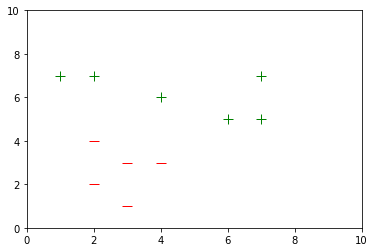

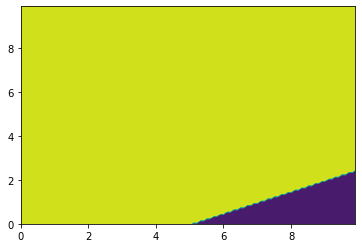

predictions [array([[0.8455347]], dtype=float32), array([[0.85814893]], dtype=float32), array([[0.59868765]], dtype=float32), array([[0.6899744]], dtype=float32), array([[0.66818774]], dtype=float32), array([[0.78583497]], dtype=float32), array([[0.7109495]], dtype=float32), array([[0.76852477]], dtype=float32), array([[0.6899744]], dtype=float32), array([[0.7502601]], dtype=float32), array([[0.66818774]], dtype=float32)]


In [14]:
weight_values = np.array([[-0.1], [0.2]]) # TODO change values and re-run
bias_value = np.array([[0.5]]) #TODO change values and re-run

# A pretty good boundary is made with:
# weight_values = np.array([[0.03], [0.12]])
# bias_value = np.array([[-0.5]])

x = tf.compat.v1.placeholder(tf.float32, (None, 2), name='x')
W = tf.Variable(weight_values, name='W', dtype=tf.float32)
b = tf.Variable(bias_value, name='b', dtype=tf.float32)
z = tf.matmul(x, W) + b
out = tf.sigmoid(z)

data = np.array([[2, 7], [1, 7], [3, 1], [3, 3], [4, 3], [4, 6], [6, 5], [7, 7], [7, 5], [2, 4], [2, 2]])
y = np.array([1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0])
with tf.compat.v1.Session() as session:
    tf.compat.v1.global_variables_initializer().run(session=session)
    classify_and_plot(data, y, x, out, session)